In [226]:
import pandas as pd
import seaborn as sns
import random
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import GridSearchCV


print(tf.__version__)


1.14.0


In [183]:
path_vcf = '../../data/res/vcf.csv'
pheno = 'GrainWeight'
pheno = 'Heading'
res_path = '../../data/phenotypes/' + pheno + '.csv'

In [184]:
#GENO

In [185]:
df_geno = pd.read_csv(path_vcf, sep='\t')

In [186]:
total_count = len(df_geno.index)
print(total_count)
df_geno.head(4)

27487


,WW007,WW011,WW015,WW004,WW020,WW010,WW024,WW014,WW019,WW003,...,WW508,WW509,WW510,WW511,WW512,#CHROM,POS,INFO,REF,ALT
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,chr1A,1145499,AR2=0.99;DR2=0.99;AF=0.13;ANN=T|synonymous_var...,C,T
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,chr1A,1145562,AR2=0.99;DR2=0.99;AF=0.025;ANN=T|synonymous_va...,C,T
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,chr1A,1174934,AR2=0.99;DR2=0.99;AF=0.011;ANN=T|synonymous_va...,C,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,chr1A,1175223,AR2=0.98;DR2=0.98;AF=0.013;ANN=T|intron_varian...,G,T


In [187]:
df_geno.insert(loc=0, column='SNP', value=df_geno['#CHROM'].astype(str) + '_' + df_geno['POS'].astype(str))
df_geno = df_geno.drop(columns={'POS','#CHROM','INFO','REF','ALT'})

In [188]:
df_geno.head(2)

,SNP,WW007,WW011,WW015,WW004,WW020,WW010,WW024,WW014,WW019,...,WW503,WW504,WW505,WW506,WW507,WW508,WW509,WW510,WW511,WW512
0,chr1A_1145499,0,0,1,0,0,1,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
1,chr1A_1145562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df_geno = df_geno.T


In [190]:
df_geno.head(2)

,0,1,2,3,4,5,6,7,8,9,...,27477,27478,27479,27480,27481,27482,27483,27484,27485,27486
SNP,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,chr1A_1344111,...,chr7D_634891921,chr7D_634891921,chr7D_634980814,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294
WW007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df_geno.columns = df_geno.iloc[0]
df_geno = df_geno.iloc[1:]
df_geno['Taxa'] = df_geno.index

In [192]:
df_geno = df_geno.reset_index()

In [193]:
df_geno.head(2)

SNP,index,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,...,chr7D_634891921,chr7D_634980814,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294,Taxa
0,WW007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW007
1,WW011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW011


In [194]:
df_geno = df_geno.drop(columns={'index'})

In [195]:
df_geno.head(2)

SNP,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,chr1A_1344111,...,chr7D_634891921,chr7D_634980814,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294,Taxa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW007
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW011


In [196]:
#PHENO

In [197]:
df_pheno = pd.read_csv(res_path, sep=',')

In [198]:
total_count = len(df_pheno.index)
print(total_count)
df_pheno.head(4)

3404


,Env,LotName,Heading
0,WS2-MTA,WW-456,90.0
1,WS2-MTA,WW-028,99.0
2,WS2-MTA,WW-449,97.0
3,WS2-MTA,WW-1002,87.0


In [199]:
#df = df[df['GrainWeight'] > 10]

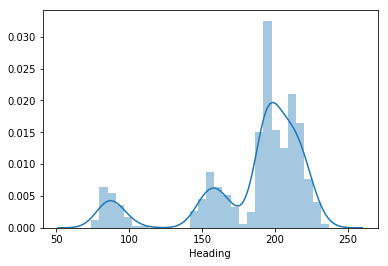

In [200]:
sns.distplot(df_pheno[pheno])

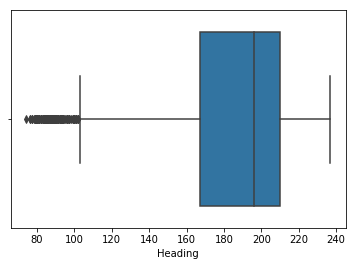

In [201]:
sns.boxplot(x=df_pheno[pheno])


In [202]:
df_geno.head(2)

SNP,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,chr1A_1344111,...,chr7D_634891921,chr7D_634980814,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294,Taxa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW007
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WW011


In [203]:
df_pheno.head(2)

,Env,LotName,Heading
0,WS2-MTA,WW-456,90.0
1,WS2-MTA,WW-028,99.0


In [204]:
df_pheno['Taxa'] = df_pheno['LotName'].str.replace('-','')

In [205]:
dummy = df_pheno.pop('LotName')


In [206]:
#ML

In [234]:
df = pd.merge(df_geno,df_pheno,on='Taxa')

In [235]:
df.head(2)

,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,chr1A_1344111,...,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294,Taxa,Env,Heading
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,WW007,WW1-INRA,155.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,WW007,WW2-KWS,219.0


In [236]:
df.Taxa.nunique()

506

In [237]:
lineas = list(df['Taxa'].unique())
frac = 0.85 * float(len(lineas))
train_lines = random.sample(lineas,int(frac))

In [238]:
len(train_lines)

430

In [239]:
train_dataset = df[df.Taxa.isin(train_lines)]
test_dataset = df[~df.Taxa.isin(train_lines)]

In [240]:
len(df.index), len(train_dataset.index), len(test_dataset.index)

(3276, 2791, 485)

In [241]:
train_taxa = train_dataset.pop('Taxa')
test_taxa = test_dataset.pop('Taxa')

In [243]:
test_dataset.head(2)

,chr1A_1145499,chr1A_1145562,chr1A_1174934,chr1A_1175223,chr1A_1210532,chr1A_1233725,chr1A_1233725,chr1A_1234867,chr1A_1338463,chr1A_1344111,...,chr7D_634980814,chr7D_635581735,chr7D_635581735,chr7D_635587011,chr7D_635587011,chr7D_636488540,chr7D_636967294,chr7D_636967294,Env,Heading
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,WS2-MTA,89.0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,WW1-INRA,152.0


In [223]:
train_labels = train_dataset.pop(pheno)
test_labels = test_dataset.pop(pheno)


In [224]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    #model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mean_absolute_error', 'mean_squared_error','mean_absolute_percentage_error'])
    model.compile(loss='mean_squared_error',
        optimizer=optimizer,
        metrics=['mean_absolute_error', 'mean_squared_error','mean_absolute_percentage_error'])
    return model
#accuracy

In [227]:
model = build_model()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [228]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1759296   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,763,521
Trainable params: 1,763,521
Non-trainable params: 0
_________________________________________________________________


In [244]:
normed_train_data = train_dataset
normed_test_data = test_dataset

In [245]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


ValueError: Error when checking input: expected dense_input to have shape (27488,) but got array with shape (27489,)

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

        
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[early_stop, PrintDot()])


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,30])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,550])
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Percentage Error')
    plt.plot(hist['epoch'], hist['mean_absolute_percentage_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_percentage_error'],
           label = 'Val Error')
    plt.ylim([0,550])
    plt.legend()
    plt.show()

    
    

plot_history(history)


In [ ]:
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=0)
loss, mae, mse, mape

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [' + Y + ']')
plt.ylabel('Predictions [' + Y + ']')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
